In [95]:
import numpy as nu
import matplotlib.pyplot as plt
from galpy.potential import SCFPotential, HernquistPotential,NFWPotential, compute_coeffs_spherical,compute_coeffs_axi
from galpy.potential import LogarithmicHaloPotential,FlattenedPowerPotential
from IPython.display import display, Math, Latex
from galpy.util.bovy_coords import cyl_to_spher, spher_to_cyl
%matplotlib inline  


In [96]:
def calculateSCFDensity(scf, R, Z=0., phi=0.):
    density = nu.zeros(len(R), float)
    if type(Z) == float: Z = nu.ones((len(R)), float)*Z
    for i in range(len(R)):
        density[i] = scf.dens(R[i],Z[i])
    return density

def rho_Hernquist(R, z=0, phi=0., a_Hernquist=1.):
    h = HernquistPotential(1., a=a_Hernquist)
    return h.dens(R,z,phi)
def rho_NFW(R, z=0, phi=0., a_NFW=1.):
    nfw = NFWPotential(amp=1.,a=a_NFW)
    return nfw.dens(R,0)

In [97]:
def plotDensityVaryinga(dens, N, aparem):
    density = nu.zeros((len(aparem), len(R)), float)
    densR = dens(R)
    plt.title("NFW Density with N={}".format(N))
    for i in range(len(aparem)):
        a = aparem[i]
        Acos, Asin = compute_coeffs_spherical(dens,N,a=a)
        scf = SCFPotential(1., Acos, Asin,a=a)
        density[i] = calculateSCFDensity(scf,R)
        dDensity = nu.fabs(density[i] - densR)
        plt.plot(R, density[i], label="a={0}".format(a))
    plt.loglog(R, densR, label="NFW Density")
    plt.legend()
    return density


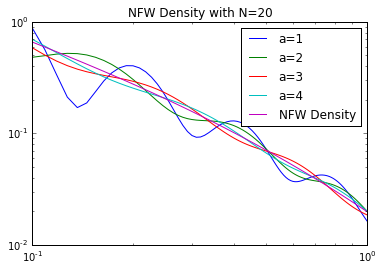

In [98]:
R = nu.linspace(.1,1,100)
density = plotDensityVaryinga(rho_NFW, 20, nu.arange(1,5))

As we see, for N=20, the smaller the a parameter, the less of a match it is.

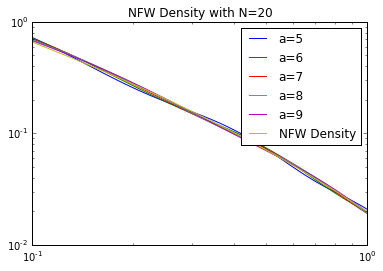

In [99]:
density = plotDensityVaryinga(rho_NFW, 20, nu.arange(5,10))

Even with the logscale, it's gotten a lot harder to tell which a value is best.

In [100]:
a1 = .1
a2 = 1.
a3 = 10.
N = 10
A1cos, A1sin = compute_coeffs_spherical(rho_Hernquist, N, a=a1)
A2cos, A2sin = compute_coeffs_spherical(rho_Hernquist, N, a=a2)
A3cos, A3sin = compute_coeffs_spherical(rho_Hernquist, N, a=a3)

In [101]:
eps = 1e-13
##Testing a = 1.
print nu.fabs(A2cos[0,0,0]) >= eps
print nu.all(nu.fabs(A2cos[1:,:,:]) <= eps)
print nu.all(nu.fabs(A2sin) <= eps)
##Testing a<1
print
print nu.fabs(A1cos[0,0,0]) >= eps
print nu.all(nu.fabs(A1cos[1:,:,:]) <= eps)
print nu.all(nu.fabs(A1sin) <= eps)

##Testing a>1
print
print nu.fabs(A3cos[0,0,0]) >= eps
print nu.all(nu.fabs(A3cos[1:,:,:]) <= eps)
print nu.all(nu.fabs(A3sin) <= eps)



True
True
True

True
False
True

True
False
True


I have found that when a_SCF!=1, all of the values in the expansion coeffecient are non-zero.

Let's try with some plots

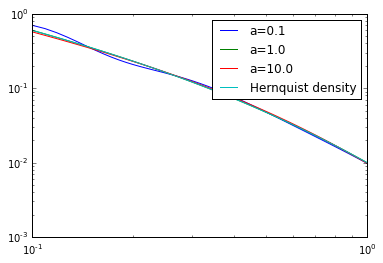

In [102]:
a_hernquist=1.
scf = SCFPotential(1., A1cos, A1sin,a=a1)
dens1 = calculateSCFDensity(scf,R)
scf = SCFPotential(1., A2cos, A2sin,a=a2)
dens2= calculateSCFDensity(scf,R)
scf = SCFPotential(1., A3cos, A3sin,a=a3)
dens3= calculateSCFDensity(scf,R)

plt.loglog(R, dens1, label="a={}".format(a1))
plt.loglog(R,dens2, label="a={}".format(a2))
plt.loglog(R,dens3, label="a={}".format(a3))
plt.loglog(R, rho_Hernquist(R, a_Hernquist=a_hernquist), label="Hernquist density")
plt.legend()

Playing around with N, It's easy to see that a_SCF=1 is always the best choice, and a=.1 is always the worst choice.